In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
import zipfile

local_zip = '/content/spritevsfanta.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tem/spritevsfanta.zip')



In [3]:

print(len(os.listdir('/tem/spritevsfanta.zip/spritevsfanta/training/fanta')))
print(len(os.listdir('/tem/spritevsfanta.zip/spritevsfanta/training/sprite')))


126
192


In [4]:
# Directory with our training fanta pictures
train_fanta_dir = os.path.join('/tem/spritevsfanta.zip/spritevsfanta/training/fanta')

# Directory with our training sprite pictures
train_sprite_dir = os.path.join('/tem/spritevsfanta.zip/spritevsfanta/training/sprite')

# Directory with our validation fanta pictures
validation_fanta_dir = os.path.join('/tem/spritevsfanta.zip/spritevsfanta/validation/fanta')

# Directory with our validation sprite pictures
validation_sprite_dir = os.path.join('/tem/spritevsfanta.zip/spritevsfanta/validation/sprite')

In [5]:
train_fanta_names = os.listdir(train_fanta_dir)
print(train_fanta_names[:2])

train_sprite_names = os.listdir(train_sprite_dir)
print(train_sprite_names[:2])

validation_fanta_names = os.listdir(validation_fanta_dir)
print(validation_fanta_names[:2])

validation_sprite_names = os.listdir(validation_sprite_dir)
print(validation_sprite_names[:2])

['CocoCola_Fanta117.jpg', 'CocoCola_Fanta14._SL1500_.jpg']
['CocoCola_Sprite142.jpg', 'CocoCola_Sprite20.jpeg']
['CocoCola_Fanta100.jpg', 'CocoCola_Fanta99.jpg']
['CocoCola_Sprite37.jpeg', 'CocoCola_Sprite2.png']


Let's find out the total number of images in fanta  and sprite  directories:

In [6]:
print('total training fanta images:', len(os.listdir(train_fanta_dir)))
print('total training sprite images:', len(os.listdir(train_sprite_dir)))
print('total validation fanta images:', len(os.listdir(validation_fanta_dir)))
print('total validation sprite images:', len(os.listdir(validation_sprite_dir)))

total training fanta images: 126
total training sprite images: 192
total validation fanta images: 8
total validation sprite images: 8


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

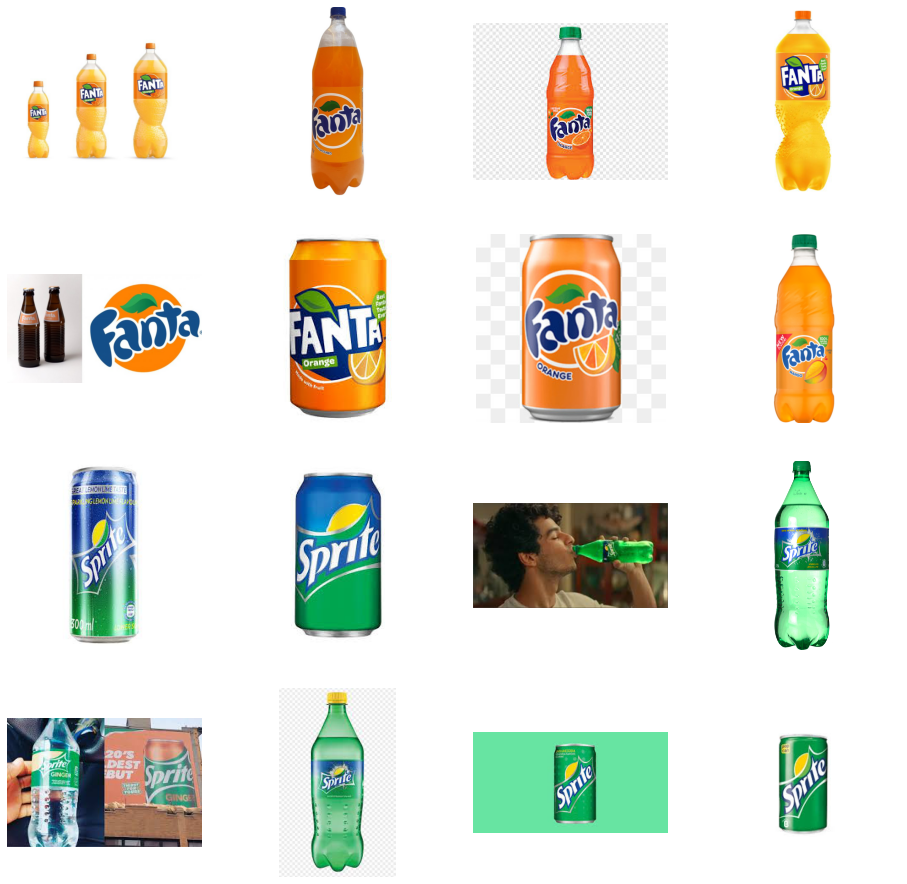

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_fanta_dir, fname) 
                for fname in train_fanta_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_sprite_dir, fname) 
                for fname in train_sprite_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

import tensorflow.

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tem/spritevsfanta.zip/spritevsfanta/training',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 299 images belonging to 2 classes.


### Training
Let's train for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=315/128,  
      epochs=15
     )

Epoch 1/15
3/2 [====================================] - 1s 402ms/step - loss: 0.7830 - accuracy: 0.5151
Epoch 2/15
3/2 [====================================] - 1s 475ms/step - loss: 0.6629 - accuracy: 0.6421
Epoch 3/15
3/2 [====================================] - 2s 640ms/step - loss: 0.6270 - accuracy: 0.6421
Epoch 4/15
3/2 [====================================] - 1s 440ms/step - loss: 0.6260 - accuracy: 0.7458
Epoch 5/15
3/2 [====================================] - 1s 415ms/step - loss: 0.6204 - accuracy: 0.6756
Epoch 6/15
3/2 [====================================] - 2s 552ms/step - loss: 0.5289 - accuracy: 0.7057
Epoch 7/15
3/2 [====================================] - 2s 719ms/step - loss: 0.3263 - accuracy: 0.8930
Epoch 8/15
3/2 [====================================] - 1s 478ms/step - loss: 0.4338 - accuracy: 0.8027
Epoch 9/15
3/2 [====================================] - 1s 393ms/step - loss: 0.2290 - accuracy: 0.9164
Epoch 10/15
3/2 [====================================] - 2s 605m

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=128)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Cococola's Sprite")
  else:
    print(fn + " is a Cococola's Fanta")
 

Saving download (1).jfif to download (1).jfif
[0.]
download (1).jfif is a fanta


In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)